In [10]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math
import sympy.plotting.plot as symplot

# Computing Limits

In [5]:
x = sym.symbols('x')
fx = x**3

lim_pnt = 1.5
lim = sym.limit(fx, x, lim_pnt)

print(lim, lim_pnt**3)

display(Math('\\lim_{x\\to %g} %s = %g' %(lim_pnt, sym.latex(fx), lim)))

3.37500000000000 3.375


<IPython.core.display.Math object>

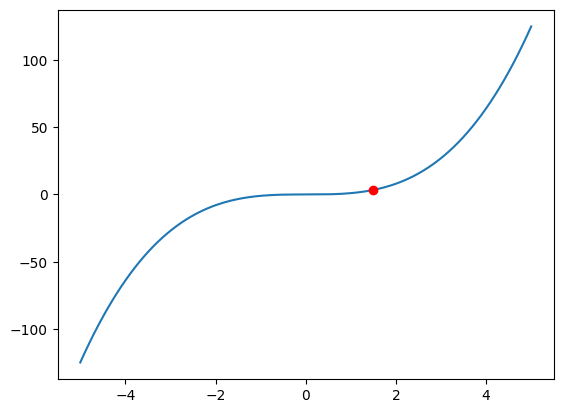

In [13]:
fxx = sym.lambdify(x, fx)
fxx(2)

xx = np.linspace(-5, 5, 200)

plt.plot(xx, fxx(xx))
plt.plot(lim_pnt, lim, 'ro')
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

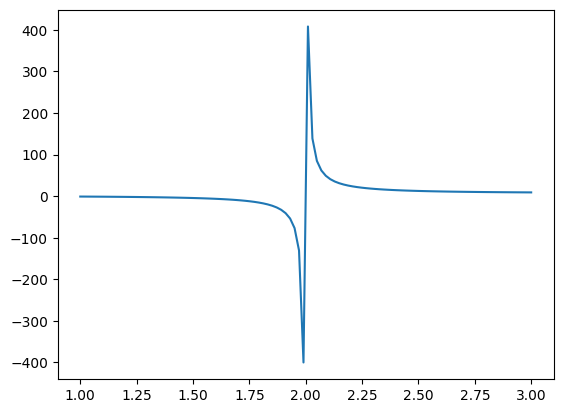

In [15]:
fx = (x**2)/(x-2)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 3, 102)

lim_pnt = 2
lim_neg = sym.limit(fx, x, lim_pnt, dir='-')
lim_pos = sym.limit(fx, x, lim_pnt, dir='+')

plt.plot(xx, fxx(xx))
display(Math('\\lim_{x\\to %g^-} %s = %g' %(lim_pnt, sym.latex(fx), lim_neg)))
display(Math('\\lim_{x\\to %g^+} %s = %g' %(lim_pnt, sym.latex(fx), lim_pos)))

plt.show()

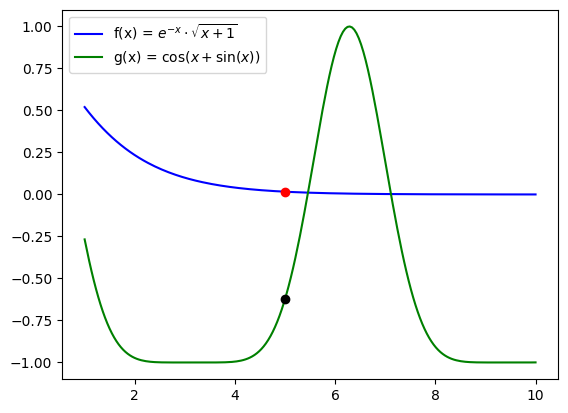

In [2]:
# f(x) = e^-x * sqrt(x + 1)
# g(x) = cos(x + sin(x))

x = sym.symbols('x')
fx = sym.exp(-x) * sym.sqrt(x + 1)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 10, 200)

lim_pnt_fx = 5
lim_fx = sym.limit(fx, x, lim_pnt_fx)

plt.plot(xx, fxx(xx),'b',label='f(x) = $e^{-x} \\cdot \\sqrt{x + 1}$')
plt.plot(lim_pnt_fx, lim_fx, 'ro')

gx = sym.cos(x + sym.sin(x))
gxx = sym.lambdify(x, gx)
lim_pnt_gx = 5
lim_gx = sym.limit(gx, x, lim_pnt_gx)

plt.plot(xx, gxx(xx),'g',label='g(x) = $\\cos(x + \\sin(x))$')
plt.plot(lim_pnt_gx, lim_gx, 'ko')

plt.legend()
plt.show()

In [18]:
lim_pnt = 5

# compute the limit of f/g
hx = fx / gx
lim_fgx = sym.limit(hx, x, lim_pnt)

display(Math('\\frac{\\lim_{x \\to %g} f(x)}{\\lim_{x \\to %g} g(x)} = \\frac{%g}{%g} = %g' \
             %(lim_pnt, lim_pnt, lim_fx, lim_gx, lim_fx / lim_gx)))

display(Math('\\lim_{x \\to %g} \\frac{f(x)}{g(x)} = %g' %(lim_pnt, lim_fgx)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Piecewise Functions

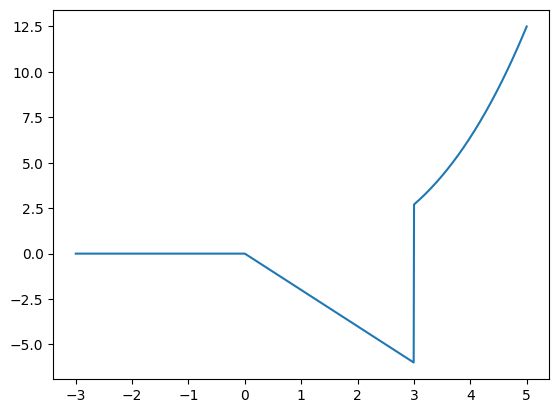

In [24]:
x = sym.symbols('x')

piece1 = 0
piece2 = -2*x
piece3 = x**3 / 10

fx = sym.Piecewise( (piece1, x < 0), (piece2, (x >= 0) & (x < 3)), (piece3, x >= 3) )
fx

fxx = sym.lambdify(x, fx)
xx = np.linspace(-3, 5, 1234)

plt.plot(xx, fxx(xx))
plt.show()

<IPython.core.display.Math object>

<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in log
  return select([less_equal(x, 0),True], [x**3,log(x)/log(2)], default=nan)
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Fo

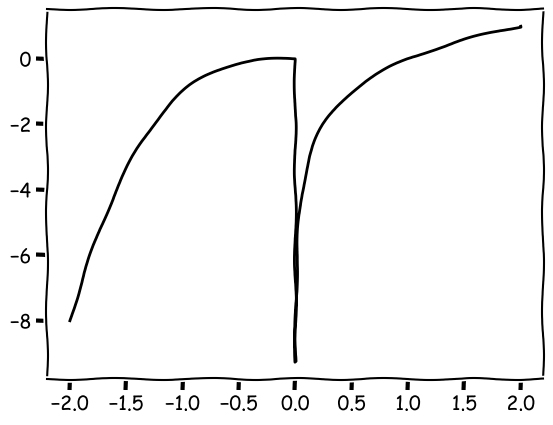

In [5]:
x = sym.symbols('x')
xx = np.linspace(-2, 2, 1234)

piece1 = x**3
piece2 = sym.log(x,2)

fx = sym.Piecewise( (piece1, x <= 0), (piece2, x > 0) )
display(Math('f(x) = ' + sym.latex(fx)))

fxx = sym.lambdify(x, fx)

with plt.xkcd():
  plt.plot(xx, fxx(xx), 'k')
plt.show()

# Derivatives

In [9]:
# Derivative of a polynomial:
# df/dx*(a*x^n) = n*a*x^(n-1)

x = sym.symbols('x')
fx = x**2
dfx = sym.diff(fx)

# Leibniz notation
display(Math('f(x) = %s, \\quad \\frac{df}{dx} = %s' %(sym.latex(fx), sym.latex(dfx))))

# Lagrange notation
display(Math('f(x) = %s, \\quad f\' = %s' %(sym.latex(fx), sym.latex(dfx))))

# Newton notation
display(Math('f(x) = %s, \\quad \\dot{f} = %s' %(sym.latex(fx), sym.latex(dfx))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

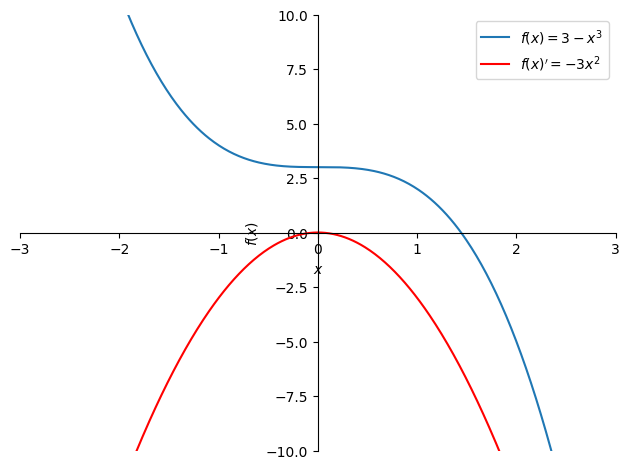

In [19]:
fx = 3 - x**3
range_x = (x,-5,5)
dfx = sym.diff(fx)

p = symplot(fx, range_x, show=False)
p.extend(symplot(sym.diff(fx), range_x, show=False))
p[1].line_color = 'r'
p[0].label = '$f(x) = %s$' %sym.latex(fx)
p[1].label = '$f(x)\' = %s$' %sym.latex(dfx)

p.legend = True
p.ylim = [-10,10]
p.xlim = [-3,3]
p.show()